# Example for using the Metric Class

In this notebook we will see how `Metric` and `MetricsList` Classes work



### To install this library:

In [ ]:
!pip install prometheus-api-client==v0.4.1

!pip install matplotlib

In [2]:
from prometheus_api_client import Metric, MetricsList, PrometheusConnect
from prometheus_api_client.utils import parse_datetime, parse_timedelta

import matplotlib.pyplot as plt
%matplotlib inline

After importing all the necessary modules, we can start with collecting some data from a prometheus host

Lets create a `PrometheusConnect` object which stores the connection parameters

In [3]:
pc = PrometheusConnect(url="http://demo.robustperception.io:9090", disable_ssl=True)

Let's print a list of all the available metrics at http://demo.robustperception.io:9090.

This is a public demo instance of Prometheus hosted by [Robust Perception](http://demo.robustperception.io:9090/consoles/index.html)

In [4]:
pc.all_metrics()[:10] # Let's print only the first 10 metric names as the list is too long.

['ALERTS',
 'ALERTS_FOR_STATE',
 'alertmanager_alerts',
 'alertmanager_alerts_invalid_total',
 'alertmanager_alerts_received_total',
 'alertmanager_build_info',
 'alertmanager_cluster_alive_messages_total',
 'alertmanager_cluster_enabled',
 'alertmanager_cluster_failed_peers',
 'alertmanager_cluster_health_score']

Now we make a query which collects the past 3 days of a specific metric (`'scrape_duration_seconds'`) in chunks of 1 day

The specific query that we make matches 4 different metric time-series, so the data that we receive should have 4 different metrics in it

In [5]:
start_time = parse_datetime("3d") # Start time is 3 days before the current timestamp.
end_time = parse_datetime("now") # End time is now.
chunk_size = parse_timedelta("now", "1d") # Chunk size is 1 day.

metric_name="scrape_duration_seconds" # `scrape_duration_seconds` is the time taken by prometheus to scrape it's targets for metrics.

metric_data = pc.get_metric_range_data(
    metric_name,
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

In [6]:
len(metric_data)

12

We see 12 different items because it is 4 different metrics with 3 chunks for each, each chunk is 1 day of data

You can use the [Prometheus Console](http://demo.robustperception.io:9090/graph?g0.range_input=3d&g0.expr=scrape_duration_seconds&g0.tab=0) to see what these metrics look like

In [7]:
for metric in metric_data:
    print(metric["metric"], "\n")

{'__name__': 'scrape_duration_seconds', 'instance': 'demo.robustperception.io:9090', 'job': 'prometheus'} 

{'__name__': 'scrape_duration_seconds', 'instance': 'demo.robustperception.io:9091', 'job': 'pushgateway'} 

{'__name__': 'scrape_duration_seconds', 'instance': 'demo.robustperception.io:9093', 'job': 'alertmanager'} 

{'__name__': 'scrape_duration_seconds', 'instance': 'demo.robustperception.io:9100', 'job': 'node'} 

{'__name__': 'scrape_duration_seconds', 'instance': 'demo.robustperception.io:9090', 'job': 'prometheus'} 

{'__name__': 'scrape_duration_seconds', 'instance': 'demo.robustperception.io:9091', 'job': 'pushgateway'} 

{'__name__': 'scrape_duration_seconds', 'instance': 'demo.robustperception.io:9093', 'job': 'alertmanager'} 

{'__name__': 'scrape_duration_seconds', 'instance': 'demo.robustperception.io:9100', 'job': 'node'} 

{'__name__': 'scrape_duration_seconds', 'instance': 'demo.robustperception.io:9090', 'job': 'prometheus'} 

{'__name__': 'scrape_duration_seco

We can see that we received 3 chunks for each of the 4 metrics, these chunks make downloading data easier, but they are a little hard to keep track of.

To keep track of multiple metrics each with multiple chunks distributed in a list, we created the `Metric` and `MetricsList` classes

### How `MetricsList` works
To combine the chunks for each metric, we can initialize a `MetricsList` object <br>
It creates a list of `Metric` objects, where each object is unique for a specific time-series.

In [8]:
metrics_object_list = MetricsList(metric_data)
print(len(metrics_object_list))
for item in metrics_object_list:
    print(type(item))

4
<class 'prometheus_api_client.metric.Metric'>
<class 'prometheus_api_client.metric.Metric'>
<class 'prometheus_api_client.metric.Metric'>
<class 'prometheus_api_client.metric.Metric'>


Above we can see that `metrics_object_list` has only 4 items and each item is a `Metric` object.


In [9]:
for item in metrics_object_list:
    print(item.metric_name, item.label_config, "\n")

scrape_duration_seconds {'instance': 'demo.robustperception.io:9090', 'job': 'prometheus'} 

scrape_duration_seconds {'instance': 'demo.robustperception.io:9091', 'job': 'pushgateway'} 

scrape_duration_seconds {'instance': 'demo.robustperception.io:9093', 'job': 'alertmanager'} 

scrape_duration_seconds {'instance': 'demo.robustperception.io:9100', 'job': 'node'} 



All 4 items are unique metric time-series, none of them are repeated. 

The constructor for `MetricsList` combined all the chunks for each metric time-series in a single `Metric` object

-----
## More about the `Metric` class
Let's look at one of the metrics from the `metrics_object_list` to learn more about the `Metric` class

In [10]:
my_metric_object = metrics_object_list[1] # one of the metrics from the list
print(type(my_metric_object))

<class 'prometheus_api_client.metric.Metric'>


What happens when we try to print the object?

In [11]:
print(my_metric_object)

{
metric_name: 'scrape_duration_seconds'
label_config: {'instance': 'demo.robustperception.io:9091', 'job': 'pushgateway'}
metric_values:                                  ds         y
0     2020-11-09 00:10:40.700000048  0.003981
1     2020-11-09 00:10:50.688999891  0.003942
2     2020-11-09 00:11:00.688999891  0.003723
3     2020-11-09 00:11:10.690000057  0.003510
4     2020-11-09 00:11:20.688999891  0.003582
...                             ...       ...
25915 2020-11-12 00:09:50.688999891  0.003779
25916 2020-11-12 00:10:00.691999912  0.006602
25917 2020-11-12 00:10:10.690999985  0.030589
25918 2020-11-12 00:10:20.697000027  0.003859
25919 2020-11-12 00:10:30.688999891  0.003585

[25920 rows x 2 columns]
}


The `Metric` object has 3 properties.

They are,

* `metric_name`: stores the name of the metric as a string

* `label_config`: stores metric labels and values as a dict

* `metric_values`: metric values as a pandas dataframe

In [12]:
my_metric_object.metric_name

'scrape_duration_seconds'

In [13]:
my_metric_object.label_config

{'instance': 'demo.robustperception.io:9091', 'job': 'pushgateway'}

In [14]:
my_metric_object.metric_values

,ds,y
0,2020-11-09 00:10:40.700000048,0.003981
1,2020-11-09 00:10:50.688999891,0.003942
2,2020-11-09 00:11:00.688999891,0.003723
3,2020-11-09 00:11:10.690000057,0.003510
4,2020-11-09 00:11:20.688999891,0.003582
...,...,...
25915,2020-11-12 00:09:50.688999891,0.003779
25916,2020-11-12 00:10:00.691999912,0.006602
25917,2020-11-12 00:10:10.690999985,0.030589
25918,2020-11-12 00:10:20.697000027,0.003859


### The `==` operator
What happens when you do `metric_object_1 == metric_object_2`? <br>
The `==` comparison operator checks if `metric_object_1` and `metric_object_2` belong to the same metric time-series.

Let's initialize a `Metric` object for each of the chunks that we downloaded from prometheus in `metric_data`

In [15]:
metric_object_chunk_list = []
for raw_metric in metric_data:
    metric_object_chunk_list.append(Metric(raw_metric))

Lets look at the metric_name and label_config for the first two metrics

In [16]:
print(metric_object_chunk_list[0].metric_name, metric_object_chunk_list[0].label_config)
print("\n-------------------------------------------------------------------------------\n")
print(metric_object_chunk_list[1].metric_name, metric_object_chunk_list[1].label_config)

scrape_duration_seconds {'instance': 'demo.robustperception.io:9090', 'job': 'prometheus'}

-------------------------------------------------------------------------------

scrape_duration_seconds {'instance': 'demo.robustperception.io:9091', 'job': 'pushgateway'}


Here both objects have the same metric name, but the label_configs have one different value (`job`), which means they belong to different metric time-series.

Hence, when we compare them `metric_object_chunk_list[0]==metric_object_chunk_list[1]` it should return false

In [17]:
print(metric_object_chunk_list[0]==metric_object_chunk_list[1])

False


Let's compare two `Metric` objects which belong to the same metric time-series

In [18]:
print(metric_object_chunk_list[0].metric_name, metric_object_chunk_list[0].label_config)
print("\n-------------------------------------------------------------------------------\n")
print(metric_object_chunk_list[4].metric_name, metric_object_chunk_list[4].label_config)

scrape_duration_seconds {'instance': 'demo.robustperception.io:9090', 'job': 'prometheus'}

-------------------------------------------------------------------------------

scrape_duration_seconds {'instance': 'demo.robustperception.io:9090', 'job': 'prometheus'}


In [19]:
print(metric_object_chunk_list[0]==metric_object_chunk_list[4])

True


Here, even though `metric_object_chunk_list[0]` and `metric_object_chunk_list[4]` have different metric_values stored in them, <br>the `==` operator returns `True` this is because they belong to the same metric time-series

----
### The `+` operator
What happens when you do `metric_object_1 + metric_object_2`?

Two `Metric` objects that belong to the same metric time-series, when added together, return a new `Metric` object with the combined metric_values that are stored in both objects

Lets try this on `metric_object_chunk_list[0]` and `metric_object_chunk_list[4]` because we know they belong to the same metric time-series

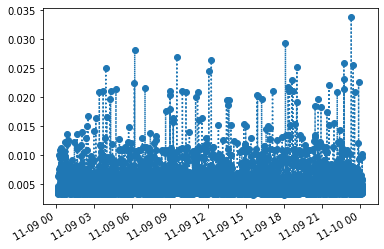

In [20]:
metric_object_chunk_list[1].plot() # plot metric-1

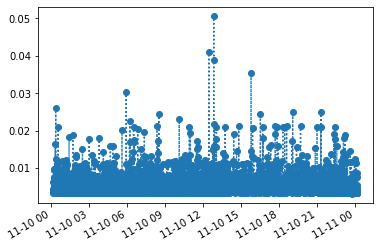

In [21]:
metric_object_chunk_list[5].plot() # plot metric-2

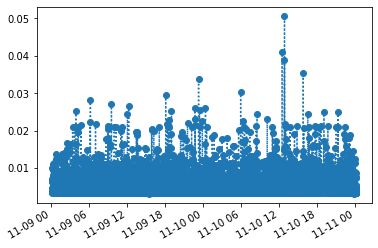

In [22]:
(metric_object_chunk_list[1] + metric_object_chunk_list[5]).plot() # plot metric-1 + metric-2

we can see the plot of the sum of metrics includes the combined data from both the previous metrics

What happens when you try to add two `Metric` objects that belong to different metric time-series?

In [23]:
metric_object_chunk_list[0] + metric_object_chunk_list[1]

TypeError: Cannot Add different metric types. Different metric labels

### Plotting
The `Metric` class also has a `plot()`method which lets you plot very simple time-series line graphs

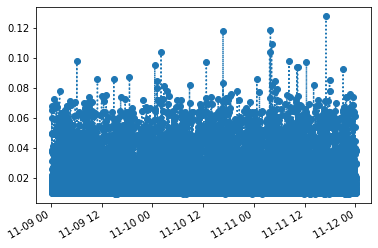

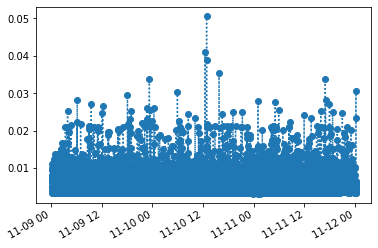

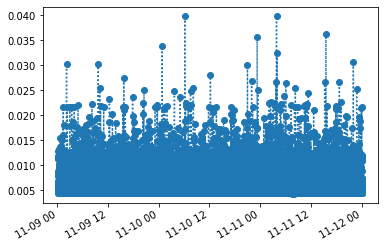

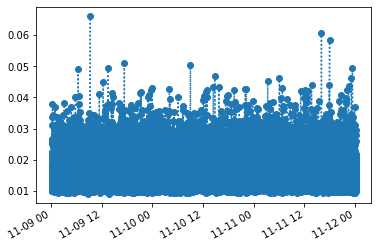

In [24]:
for item in metrics_object_list:
    item.plot()